## Importing necessory libraries

In [115]:
# Dataframe Manipulation and Analysis Libraries

import pandas as pd
import numpy as np

# Data Visualization Libraries

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 

# Library to Filter Warnings

import warnings
warnings.filterwarnings('ignore')

# Multi-Collinearity Test Package
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preparation Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
import xgboost

# Feature Decomposition Library
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Model Evaluation Libraries
from sklearn.metrics import r2_score,mean_squared_error

# Clustering Library
from sklearn.cluster import KMeans

# Learning Curve Analysis Library
from sklearn.model_selection import learning_curve


## Loading Dataset

In [116]:
df1 = pd.read_excel("Medibuddy insurance data personal details (1) (2).xlsx")
df2 = pd.read_csv("Medibuddy Insurance Data Price (1) (2).csv")

In [117]:
df1.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [118]:
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


### Merging Two columns

In [119]:
df = pd.merge(official_details,personal_details)

In [120]:
df.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


### Dropping Policy no. column
- column Policy no. is not required in data

In [121]:
df.drop('Policy no.',axis = 1,inplace = True)

## Problem Statement

- There are two datasets, one having the age and BMI(Body Mass Index) that is received from a pre health checkup before the policy cover; and the other dataset includes some personal details such as the no. of children, whether the person smokes or not, the location where the person is from etc.

- Build a machine learning model to predict the amount spent to the utmost accuracy. Validate and hyper parametrically tune the model to get the best results.

## EDA (Exploratory Data Analysis)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   charges in INR  1338 non-null   float64
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   object 
 6   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Obseravations :
1. Dataset contain 8 columns and 1338 reccords
2. 3 columns are have string datatype and 5 columns of numeric datatype.
3. Dataset not  have any Null Values

In [123]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [124]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [125]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Observation :
1. There are three catagorical features smoker,region,sex
2. smoker has two catagory yes and no
3. region has four catagory southeast,southwest,northwest,northeast
4. sex has two catagory male and female.

### Encoding Catagorical Feature

In [126]:
df['sex'] = df['sex'].replace({'female':0,'male':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})
df = pd.get_dummies(df,columns = ['region'])

In [127]:
df

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1725.55230,1,0,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,0,1,0
3,33,1,22.705,21984.47061,0,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,0,1,0,0
1334,18,0,31.920,2205.98080,0,0,1,0,0,0
1335,18,0,36.850,1629.83350,0,0,0,0,1,0
1336,21,0,25.800,2007.94500,0,0,0,0,0,1


### Descriptive Analysis

In [128]:
df.describe()

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,13270.422265,1.094918,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,12110.011237,1.205493,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,16639.912515,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,63770.428010,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations :
1. Charges and Smoker may have outlier because mean and median are not same.
2. Charges and Smoker in INR might have outlier on upper region.

## Building Custom Summery function for indepth EDA report

In [196]:
def custom_summary(mydf):
    cols = []
    for i in df.columns:
        if mydf[i].dtype != object:
            cols.append(i)
    result = pd.DataFrame(columns = cols,index=['datatype','count','min','Q1','Q2','Q3','Max','Mean','stddev','skew','kurt','range','IQR','skew_comment','kurt_comment','outlier_comment'])
    for i in result.columns:
        result.loc['datatype',i] = mydf[i].dtype
        result.loc['count',i] = mydf[i].count()
        result.loc['min',i] = mydf[i].min()
        result.loc['Q1',i] = mydf[i].quantile(0.25)
        result.loc['Q2',i] = mydf[i].quantile(0.50)
        result.loc['Q3',i] = mydf[i].quantile(0.75)
        result.loc['Max',i] = mydf[i].quantile(1)
        result.loc['Mean',i] = round(mydf[i].mean(),2)
        result.loc['stddev',i] = round(mydf[i].std(),2)
        result.loc['skew',i] = round(mydf[i].skew(),2)
        result.loc['kurt',i] = round(mydf[i].kurt(),2)
        result.loc['range',i] = mydf[i].quantile(1)-mydf[i].min()
        result.loc['IQR',i] = mydf[i].quantile(0.75)-mydf[i].quantile(0.25)
        
        #Adding Comments for skewness
        if result.loc['skew',i] < -1:
            sk_label = 'Highly negatively skewed'
        elif -1 < result.loc['skew',i] <= -0.5:
            sk_label = 'Moderately negatively skewed'
        elif -0.5 < result.loc['skew',i] <= 0:
            sk_label = 'Approximately normally distributed(-ve)'
        elif 0 < result.loc['skew',i] <= 0.5:
            sk_label = 'Approximately normally distributed(+ve)'
        elif 0.5 < result.loc['skew',i] <= 1:
            sk_label = 'Moderately Positively Skewd'
        elif result.loc['skew',i] > 1:
            sk_label = 'Highly Positively Skewd'
        else:
            sk_label = 'error'
        result.loc['skew_comment',i] = sk_label
        
        #Adding Comments for Kurtosis
        if result.loc['kurt',i] < -1:
            ku_label = 'Highly Platykurtic'
        elif -1 < result.loc['kurt',i] <= -0.5:
            ku_label = 'Moderately Platykurtic'
        elif -0.5 < result.loc['kurt',i] <= 0.5:
            ku_label = 'Mesokurtic'
        elif 0.5 < result.loc['kurt',i] <= 1:
            ku_label = 'Moderately Leptokurtic'
        elif result.loc['kurt',i] > 1:
            ku_label = 'Highly Leptokurtic'
        else:
            ku_label = 'error'
        result.loc['kurt_comment',i] = ku_label
        
        #adding comments for outliers
        LW = result.loc['Q1',i] - (1.5*result.loc['IQR',i])
        UW = result.loc['Q3',i] + (1.5*result.loc['IQR',i])
        
        if len([x for x in mydf[i] if x < LW or x> UW]) > 0:
            outlier_lable = "Have Outliers"
        else:
            outlier_lable = "No Outliers"
            
        result.loc['outlier_comment',i] = outlier_lable
        
    return result

In [197]:
custom_summary(df)

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
datatype,int64,int64,float64,float64,int64,int64,uint8,uint8,uint8,uint8
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
min,18,0,18.5,1121.8739,0,0,0,0,0,0
Q1,27.0,0.0,26.6,4740.28715,0.0,0.0,0.0,0.0,0.0,0.0
Q2,39.0,1.0,30.59,9382.033,1.0,0.0,0.0,0.0,0.0,0.0
Q3,51.0,1.0,34.1,16639.912515,2.0,0.0,0.0,0.0,1.0,0.0
Max,64.0,1.0,42.75,63770.42801,5.0,1.0,1.0,1.0,1.0,1.0
Mean,39.21,0.51,30.44,13270.42,1.09,0.2,0.24,0.24,0.27,0.24
stddev,14.05,0.5,5.29,12110.01,1.21,0.4,0.43,0.43,0.45,0.43
skew,0.06,-0.02,0.08,1.52,0.94,1.46,1.21,1.2,1.03,1.2


Analysis :
- we have outlier in smoker, bmi and charges in INR,region_northeast,region_northwest,region_southwest.

## Checkig for outlier using boxplot

In [131]:
def replace_outlier(mydf,col,method = 'std', stratergy = 'mean'):
    if method == 'Quartile':
        Q1 = mydf[col].quantile(0.25)
        Q2 = mydf[col].quantile(0.50)
        Q3 = mydf[col].quantile(0.75)
        IQR = Q3 - Q1
        LW = Q1 - (1.5 * IQR)
        UW = Q3 + (1.5 * IQR)
    elif method == 'std':
        mean = mydf[col].mean()
        std = mydf[col].std()
        LW = mean - (2 * std)
        UW = mean + (2 * std)
    else:
        print('Pass a corect method')
        
    #printing all the outliers 
    outliers = mydf.loc[(mydf[col] < LW) | (mydf[col] > UW),col]
    outliers_density = round(len(outliers) / len(mydf),2)
    if len(outliers) == 0:
        print(f'feature {col} does not have any outliers')
    else:
        print(f'feature {col} has otliers')
        print(f'total no of outliers in {col} is {len(outliers)}')
        print(f'outliers percentage in {col} is {outliers_density*100}%')
    
    if stratergy == 'median':
        mydf.loc[(mydf[col] < LW), col] = Q1 
        mydf.loc[(mydf[col] > UW), col] = Q3 
    elif stratergy == 'mean':
        mydf.loc[(mydf[col] < LW), col] = mean 
        mydf.loc[(mydf[col] > UW), col] = mean
    else:
        print('pass the correct stratergy')
        
    return mydf

In [132]:
def odt_plots(mydf,col):
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    #discriptive statistics box plot
    sns.boxplot(mydf[col],ax = ax1)
    ax1.set_title(col + ' boxplot')
    ax1.set_xlabel('values')
    ax1.set_ylabel('boxplot')
    #replacing the outliers
    mydf_out = replace_outlier(mydf,col)
    #plotting box plot without outliers
    sns.boxplot(mydf_out[col],ax = ax2)
    ax2.set_title(col + ' boxplot')
    ax2.set_xlabel('values')
    ax2.set_ylabel('boxplot')
    plt.show()

feature bmi has otliers
total no of outliers in bmi is 57
outliers percentage in bmi is 4.0%


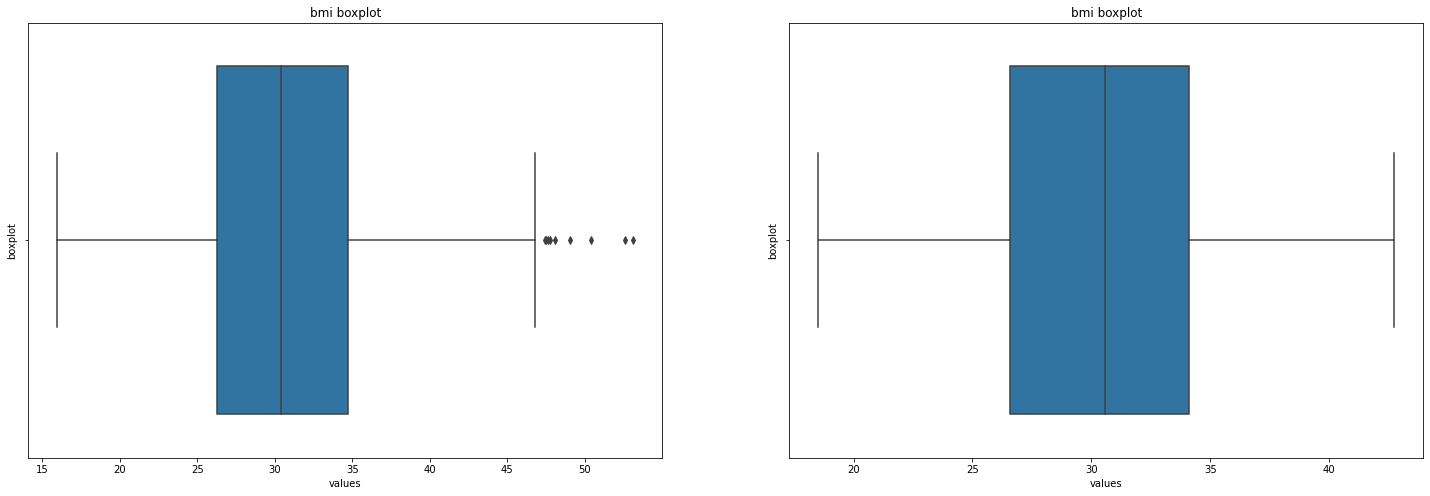

In [133]:
#We are treating only bmi column for outliers as other features that has outliers contains 0 and 1 only.
odt_plots(df,'bmi')

## Multivariate analysis using Regression

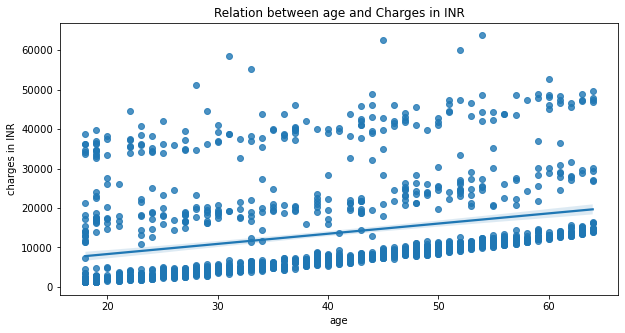

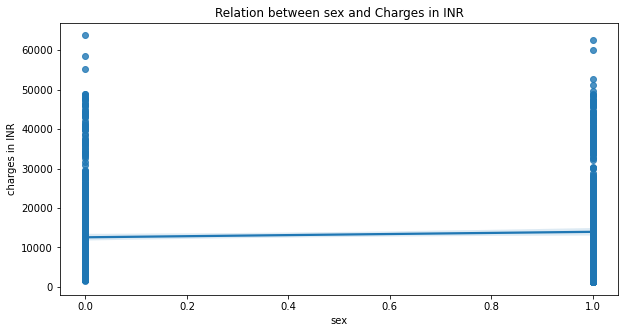

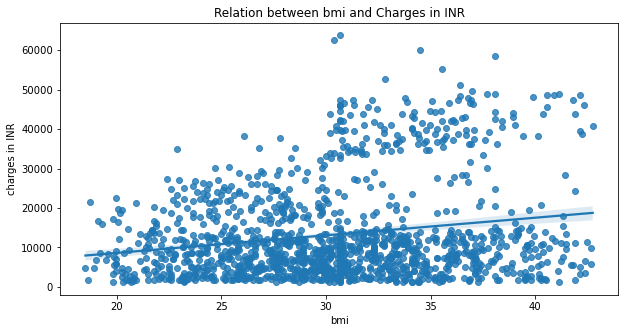

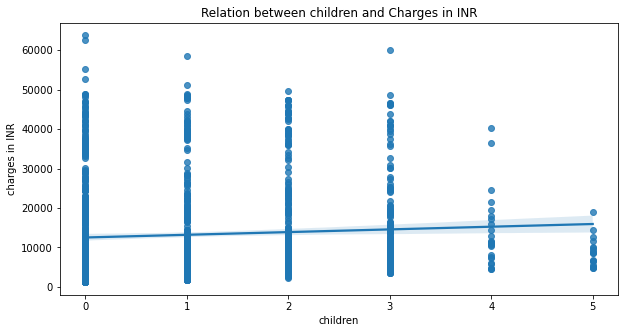

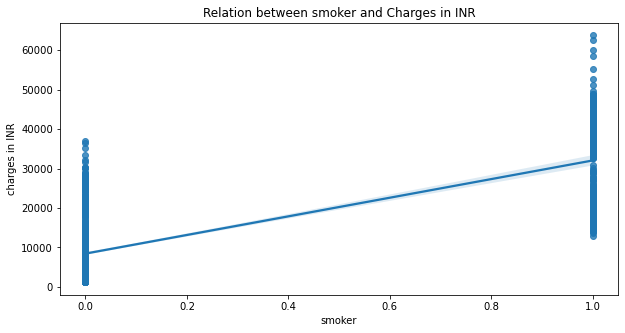

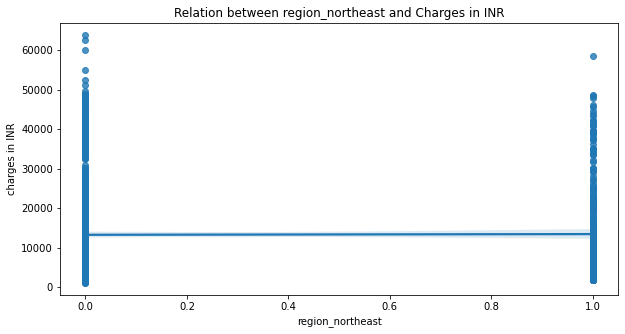

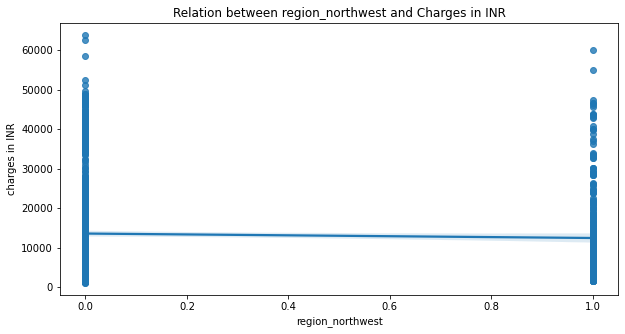

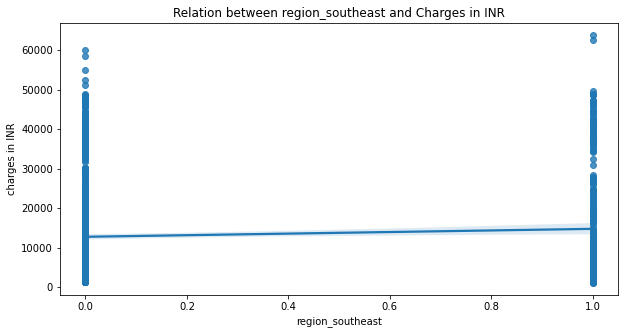

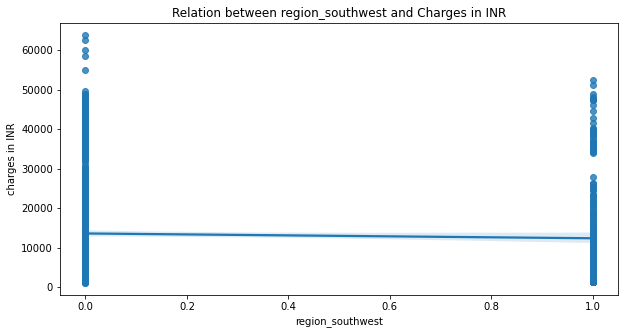

In [134]:
for col in df.columns:
    if col != 'charges in INR':
        fig,ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col] , y = df['charges in INR'],ax = ax1).set_title(f'Relation between {col} and Charges in INR')

Analysis :
1. children and charges in INR have mild postive correlation.
2. smoker and charges in INR have strong postive correlation.
3. age and charges in INR have strong postive correlation.
4. sex and charges in INR have mild positive correlation.
5. bmi and charges in INR have strong postive correlation.
6. charges in INR and region_northEast has a very Mild Negative Correlation.
7. charges in INR and region_northWest has a very Mild Negative Correlation.
8. charges in INR and region_sothEast has a very Mild Positive Correlation.
9. charges in INR and region_southWest has a very Mild Negative Correlation.

## Multi-Colineaity Check
- Stage 1 :
    Crrelation HeatMap

<AxesSubplot:>

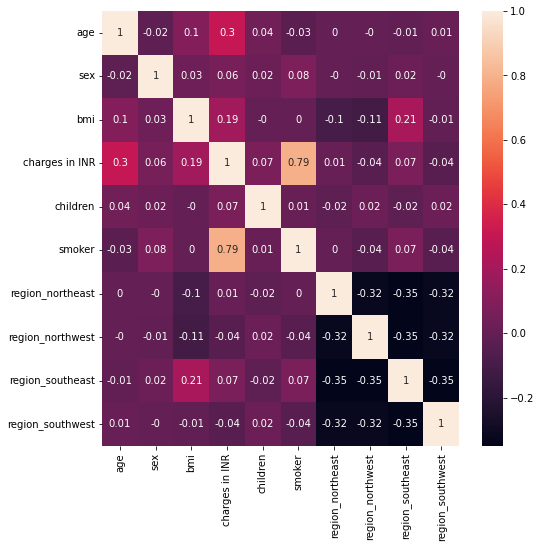

In [135]:
corr = round(df.corr(),2)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr,annot = True)

Analsis:
- Independent Variable pair with Correlation > 30% are Listed Below -
1. region_northEast and region_northWest  
2. region_northEast and region_southEast
3. region_southEast and region_northWest
4. region_northEast and region_southWest
5. region_southEast and region_southWest
6. region_northWest and region_southWest

- Stage 2 : Variane Inflating Factor(VIF)

  formula for VIF = 1/(1-R2)
    1. Regress every independent variable with each other and find the R2 score 
    2. find out VIF using above formula 
    3. if VIF is more than 5 for any independent variable we can conclude that multi-colinearity exist.

In [136]:
def VIF(independent_variable):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(independent_variable.values,i) for i in range(independent_variable.shape[1])]
    vif['Independent Variable'] = independent_variable.columns
    return vif.sort_values(by = 'VIF',ascending = False)

In [137]:
VIF(df.drop('charges in INR',axis = 1))

,VIF,Independent Variable
7,13.321031,region_southeast
8,10.977398,region_southwest
6,10.472630,region_northwest
5,10.464904,region_northeast
2,1.064338,bmi
0,1.014845,age
4,1.011933,smoker
1,1.007853,sex
3,1.003869,children


#### Analysis :
- Region_NorthEast,Region_NorthWest,Region_SouthEast and Region_SouthWest have VIF score greater than 5 , so we can conclude that Multi-Collinearity exists

### Correlation with Target Feature

In [138]:
def CWT(data,tcol):
    independent_variables = data.drop(tcol,axis=1).columns
    corr_result = []
    for col in independent_variables :
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['independent variables','correlation']).T
    return result.sort_values(by='correlation',ascending = False)

In [139]:
CWT(df,'charges in INR')

,independent variables,correlation
4,smoker,0.787251
0,age,0.299008
2,bmi,0.194955
7,region_southeast,0.073982
3,children,0.067998
1,sex,0.057292
5,region_northeast,0.006349
6,region_northwest,-0.039905
8,region_southwest,-0.04321


Analysis : 
- Smoker,Age and Bmi has high correlation with Charges in INR..

In [140]:
new_df = df.drop('region_northeast',axis = 1)

In [141]:
new_df

,age,sex,bmi,charges in INR,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,1
1,18,1,33.770,1725.55230,1,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,1,0
3,33,1,22.705,21984.47061,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,1,0,0
1334,18,0,31.920,2205.98080,0,0,0,0,0
1335,18,0,36.850,1629.83350,0,0,0,1,0
1336,21,0,25.800,2007.94500,0,0,0,0,1


In [142]:
VIF(new_df.drop('charges in INR',axis = 1))

,VIF,Independent Variable
2,11.636309,bmi
0,7.931341,age
6,2.197501,region_southeast
1,2.004895,sex
7,1.956888,region_southwest
5,1.907911,region_northwest
3,1.808589,children
4,1.263750,smoker


### Principal Component Analysis (PCA) :

In [143]:
def PCA_1(x):
    n_comp = len(x.columns)
    scalar = StandardScaler()
    x = scalar.fit_transform(x)
    
    # Applying PCA
    
    for i in range(1,n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9 :
            n_components = i
            break
    print('Explained Variance Ration After PCA is : ',evr)
    
    # Creating PCA Dataframe
    
    col = []
    for j in range(1,n_components + 1):
        col.append('PC_' + str(j))
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df

In [144]:
transformed_df = PCA_1(df.drop('charges in INR',axis = 1))

Explained Variance Ration After PCA is :  [0.16729251 0.3154863  0.46243905 0.58352576 0.70091226 0.80799465
 0.91042994]


In [145]:
transformed_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-0.334683,1.203679,-1.078738,1.964438,-1.128377,0.195810,1.929012
1,1.832481,-0.353799,0.326669,1.026190,-0.655365,0.249773,-1.543259
2,1.749963,-0.130534,0.387935,0.454818,0.611082,1.346111,-1.616531
3,-1.502321,-0.034874,1.746425,0.944122,-0.469916,-0.922650,-0.648905
4,-0.973071,0.054743,1.728046,0.650596,-0.298786,-1.215171,-0.786236
...,...,...,...,...,...,...,...
1333,-0.803771,0.455024,1.804755,-0.517774,1.804308,0.198597,-0.889984
1334,-0.796588,-1.589890,-1.038310,-0.080759,-1.603262,0.067568,-0.271160
1335,1.960580,-0.327912,0.297785,0.018210,-2.059936,0.308004,-0.362934
1336,-0.864579,1.510334,-1.056253,0.706218,-1.985804,0.264000,0.166701


### Joining PCA Features with Target Feature

In [147]:
transformed_df = transformed_df.join(df['charges in INR'], how = 'left')
transformed_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,charges in INR
0,-0.334683,1.203679,-1.078738,1.964438,-1.128377,0.195810,1.929012,16884.92400
1,1.832481,-0.353799,0.326669,1.026190,-0.655365,0.249773,-1.543259,1725.55230
2,1.749963,-0.130534,0.387935,0.454818,0.611082,1.346111,-1.616531,4449.46200
3,-1.502321,-0.034874,1.746425,0.944122,-0.469916,-0.922650,-0.648905,21984.47061
4,-0.973071,0.054743,1.728046,0.650596,-0.298786,-1.215171,-0.786236,3866.85520


In [148]:
VIF(transformed_df.drop('charges in INR',axis = 1))

,VIF,Independent Variable
2,1.0,PC_3
5,1.0,PC_6
0,1.0,PC_1
1,1.0,PC_2
3,1.0,PC_4
6,1.0,PC_7
4,1.0,PC_5


Analysis :
- VIF < 5 for all feature . there is no multi-colinearity after PCA.

# Model Building 
1. Use Train Test Split
2. Cross Validation
3. Hyper Parameter Tuning

In [149]:
def train_and_test_split(data,tcol,testsize = 0.2):
    x = data.drop(tcol,axis = 1)
    y = data[tcol]
    return train_test_split(x,y,test_size = testsize , random_state = 1)  

In [150]:
def model_builder(model_name,estimator,data,tcol): 
    x_train,x_test,y_train,y_test = train_and_test_split(data,tcol)        
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))   
    return [model_name,accuracy,rmse]

In [152]:
def multiple_models(data,t_col):
    col_names=['Model Name','R2 Score','RMSE']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LinearRegression(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Decision Tree Regressor',DecisionTreeRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Lasso',Lasso(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Ridge',Ridge(),df,'charges in INR')
    result.loc[len(result)] = model_builder('K Neighbors Regressor',KNeighborsRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('SVR',SVR(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Random Forest Regressor',RandomForestRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('AdaBoost Regressor',AdaBoostRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Gradient Boost Regressor',GradientBoostingRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('XGB Regressor',XGBRegressor(),df,'charges in INR')
    
    result1 =result.sort_values(by = 'R2 Score',ascending = False)
    return result1.reset_index(drop=True)

In [153]:
multiple_models(transformed_df,'charges in INR')

,Model Name,R2 Score,RMSE
0,Gradient Boost Regressor,0.869719,4410.033259
1,Random Forest Regressor,0.852874,4686.478812
2,XGB Regressor,0.807761,5357.017000
3,Linear Regression,0.763242,5945.036207
4,Lasso,0.763233,5945.139960
5,Ridge,0.763066,5947.236271
6,Decision Tree Regressor,0.721809,6444.268970
7,AdaBoost Regressor,0.650894,7219.051965
8,K Neighbors Regressor,0.166882,11152.057809
9,SVR,-0.115770,12905.925967


## Cross Validation

In [154]:
def KFoldCV(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_las = cross_val_score(Lasso(),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeRegressor(),x,y,cv = fold)
    score_rid = cross_val_score(Ridge(),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(),x,y,cv = fold)
    score_svr = cross_val_score(SVR(),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(),x,y,cv = fold)
    
    model_names = ['Linear Regression','Decision Tree Regressor','Lasso','Ridge','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    scores = [score_lr,score_las,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    KFold_df = pd.DataFrame(result,columns = ['Model Name','CV Score','CV Stdev'])   
    KFold_df1 =KFold_df.sort_values(by = 'CV Score',ascending = False)
    
    return KFold_df1.reset_index(drop=True)

In [155]:
KFoldCV(transformed_df.drop('charges in INR',axis = 1),transformed_df['charges in INR'])

,Model Name,CV Score,CV Stdev
0,Gradient Boost Regressor,0.783914,0.043826
1,Random Forest Regressor,0.782625,0.044868
2,XGB Regressor,0.769735,0.046169
3,K Neighbors Regressor,0.762749,0.036012
4,Ridge,0.733090,0.041927
5,Decision Tree Regressor,0.733082,0.041991
6,Linear Regression,0.733080,0.042005
7,Lasso,0.599281,0.079421
8,AdaBoost Regressor,0.556356,0.032796
9,SVR,-0.101577,0.030323


## Hyper Parameter Tuning

In [38]:
def tuning(x,y,fold = 10):
    
    # Parameter Grids for Different Models
    
    param_las = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_rd = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_dtr = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt']}
    param_knr = {'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
    param_svr = {'gamma':['scale','auto'],'C':[0.1,1,1.5,2]}
    param_rf = {'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt'],'n_estimators':[50,100,150,200]}
    param_ad = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.5,0.7,1,5,10,20,50,100]}
    param_gb = {'n_estimators':[50,100,150,200],'loss':['squared_error','absolute_error','huber','quantile']}
    param_xgb = {'eta':[0.1,0.5,0.7,1,5,10 ,20,50,100],'max_depth':[3,5,7,9,11],'gamma':[0,10,20,50,100],'reg_lambda':[0,1,3,5,7,10],'alpha':[0,1,3,5,7,10]}
    
    # Creating Model Object
    
    tune_las = RandomizedSearchCV(Lasso(),param_las,cv = fold)
    tune_rd = RandomizedSearchCV(Ridge(),param_rd,cv = fold)
    tune_dtr = RandomizedSearchCV(DecisionTreeRegressor(),param_dtr,cv = fold)
    tune_knr = RandomizedSearchCV(KNeighborsRegressor(),param_knr,cv = fold)
    tune_svr = RandomizedSearchCV(SVR(),param_svr,cv = fold)
    tune_rf = RandomizedSearchCV(RandomForestRegressor(),param_rf,cv = fold)
    tune_ad = RandomizedSearchCV(AdaBoostRegressor(),param_ad,cv = fold)
    tune_gb = RandomizedSearchCV(GradientBoostingRegressor(),param_gb,cv = fold)
    tune_xgb = RandomizedSearchCV(XGBRegressor(),param_xgb,cv = fold)
    
    # Model Fitting
    
    tune_las.fit(x,y)
    tune_rd.fit(x,y)
    tune_dtr.fit(x,y)
    tune_knr.fit(x,y)
    tune_svr.fit(x,y)
    tune_rf.fit(x,y)
    tune_ad.fit(x,y)
    tune_gb.fit(x,y)
    tune_xgb.fit(x,y)
    
    tune = [tune_las,tune_rd,tune_dtr,tune_knr,tune_svr,tune_rf,tune_ad,tune_gb,tune_xgb]
    #tune = [tune_knr,tune_ad,tune_xgb]
    models = ['Lasso','Ridge','Decision Tree Regressor','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    #models = ['KNN Regressor','AdaBoost Regressor','XGB Regressor']
    for i in range(len(tune)):
        print('Model :',models[i])
        print('Best Params :',tune[i].best_params_)
    

In [39]:
#tuning(transformed_details.drop('charges in INR',axis = 1),transformed_details['charges in INR'])

In [156]:
def CV_Post_HPT(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_las = cross_val_score(Lasso(alpha = 20),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeRegressor(criterion = 'friedman_mse',max_depth = 7,max_features = 7),x,y,cv = fold)
    score_rid = cross_val_score(Ridge(alpha = 5),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(weights = 'distance',algorithm = 'brute'),x,y,cv = fold)
    score_svr = cross_val_score(SVR(gamma = 'scale',C = 2),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(max_depth = 11,max_features = 3,n_estimators = 150),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(n_estimators = 50,learning_rate = 0.1),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(n_estimators = 150,loss ='squared_error'),x,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(eta =0.1,max_depth = 5,gamma = 10,reg_lambda = 7,alpha = 1),x,y,cv = fold)
    
    model_names = ['Linear Regression','Decision Tree Regressor','Lasso','Ridge','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    scores = [score_lr,score_las,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    KFold_df = pd.DataFrame(result,columns = ['Model Name','CV Score','CV Stdev']).sort_values(by = 'CV Score',ascending = False)  
    KFold_df = KFold_df.reset_index(drop=True)
    return KFold_df

In [157]:
CV_Post_HPT(transformed_df.drop('charges in INR',axis = 1),transformed_df['charges in INR'])

,Model Name,CV Score,CV Stdev
0,Random Forest Regressor,0.793798,0.038881
1,XGB Regressor,0.792652,0.042945
2,Gradient Boost Regressor,0.784191,0.044460
3,K Neighbors Regressor,0.764681,0.040211
4,Ridge,0.733119,0.041620
5,Decision Tree Regressor,0.733094,0.041743
6,Linear Regression,0.733080,0.042005
7,AdaBoost Regressor,0.710246,0.036954
8,Lasso,0.702786,0.040789
9,SVR,-0.097112,0.030190


# Clustering
- Using Clustering to check if it can help us to improve Accuraccy

In [159]:
df

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1725.55230,1,0,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,0,1,0
3,33,1,22.705,21984.47061,0,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,0,1,0,0
1334,18,0,31.920,2205.98080,0,0,1,0,0,0
1335,18,0,36.850,1629.83350,0,0,0,0,1,0
1336,21,0,25.800,2007.94500,0,0,0,0,0,1


In [161]:
x = df[['age','charges in INR']].values

Text(0, 0.5, 'WCCS')

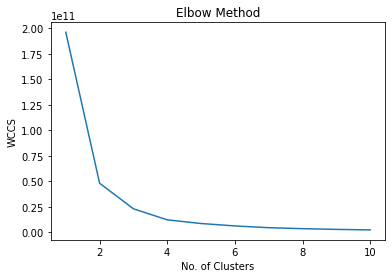

In [162]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCCS')

<AxesSubplot:xlabel='age', ylabel='charges in INR'>

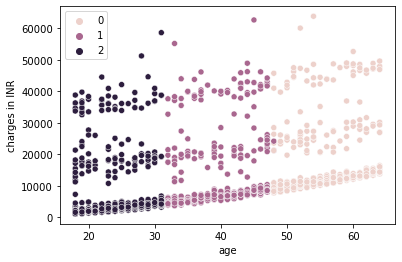

In [163]:
labels = KMeans(n_clusters=3,random_state=42)
cluster = labels.fit_predict(merged_details.drop('charges in INR',axis=1))
sns.scatterplot(x=merged_details['age'],y=merged_details['charges in INR'],hue = cluster)

In [164]:
def clustering(x,tcol,cluster):
    column = list(set(list(x.columns)) - set(list('charges in INR')))
    #column = list(x.columns)
    R = int(len(column)/2) 
    if len(column) % 2 == 0:
        R = R
    else:
        R += 1
    f,ax = plt.subplots(R,2,figsize = (15,15))
    a = 0
    for row in range(R):
        for col in range(2):
            if a != len(column):
                ax[row][col].scatter(x[tcol],x[column[a]],c = cluster)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a += 1 
            

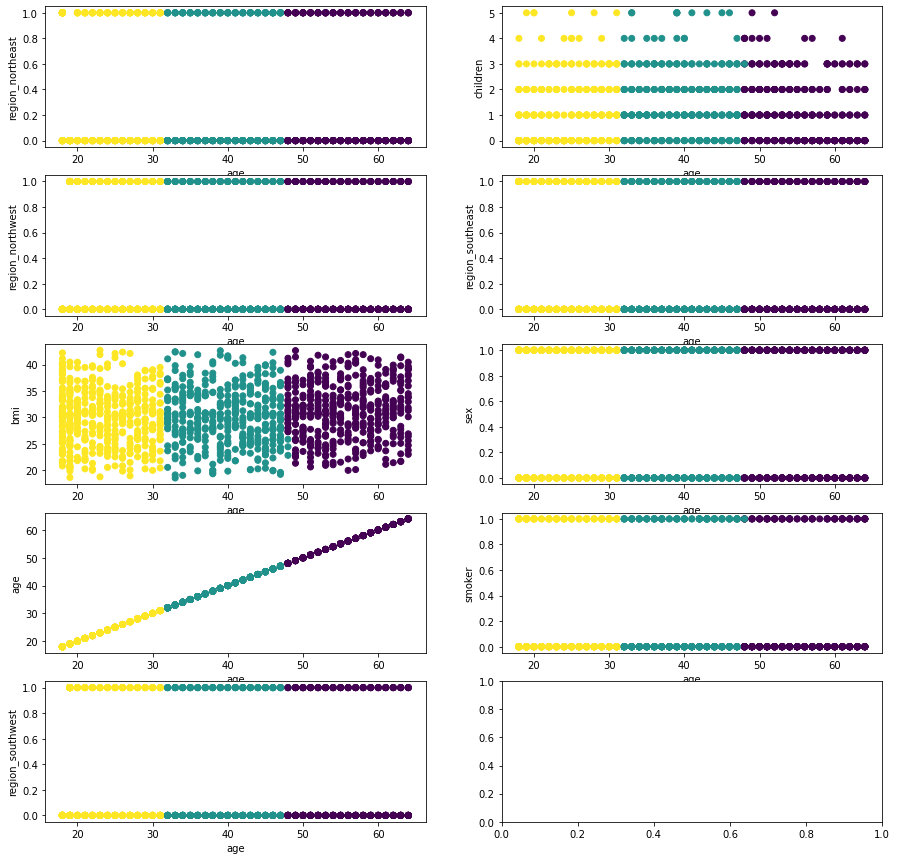

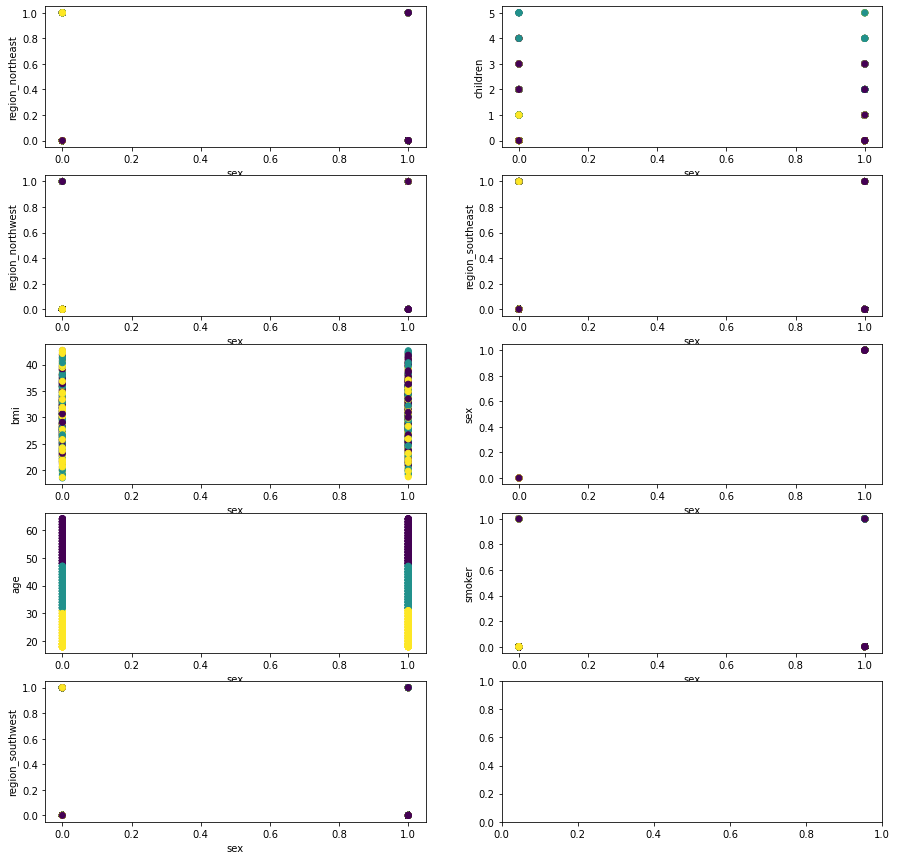

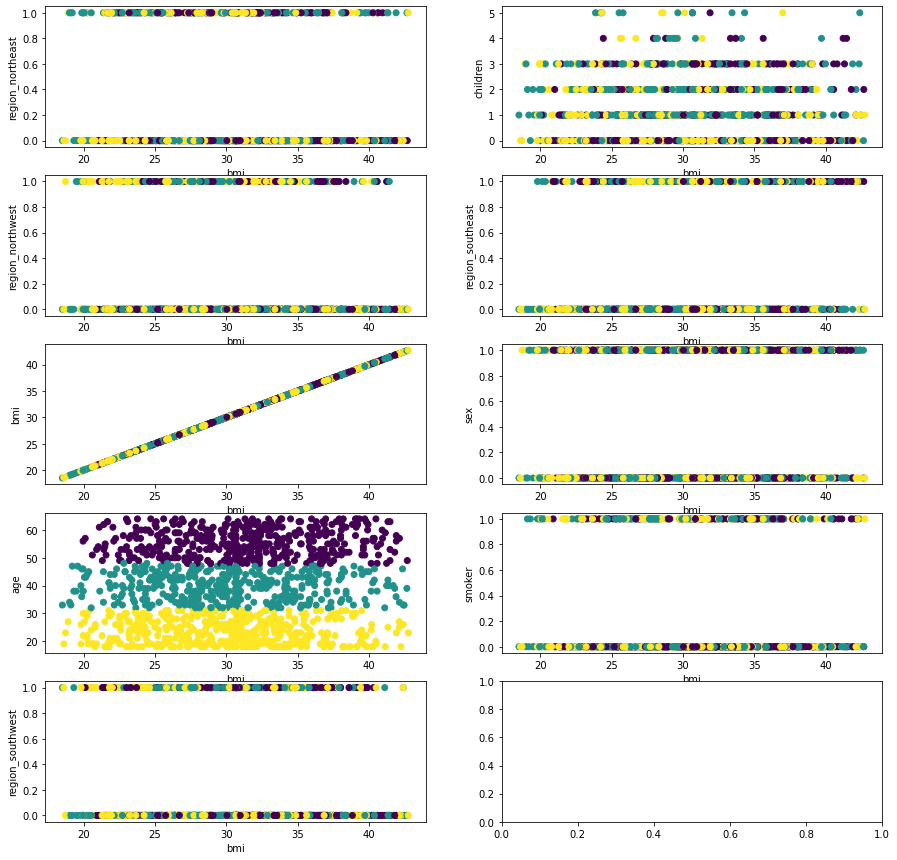

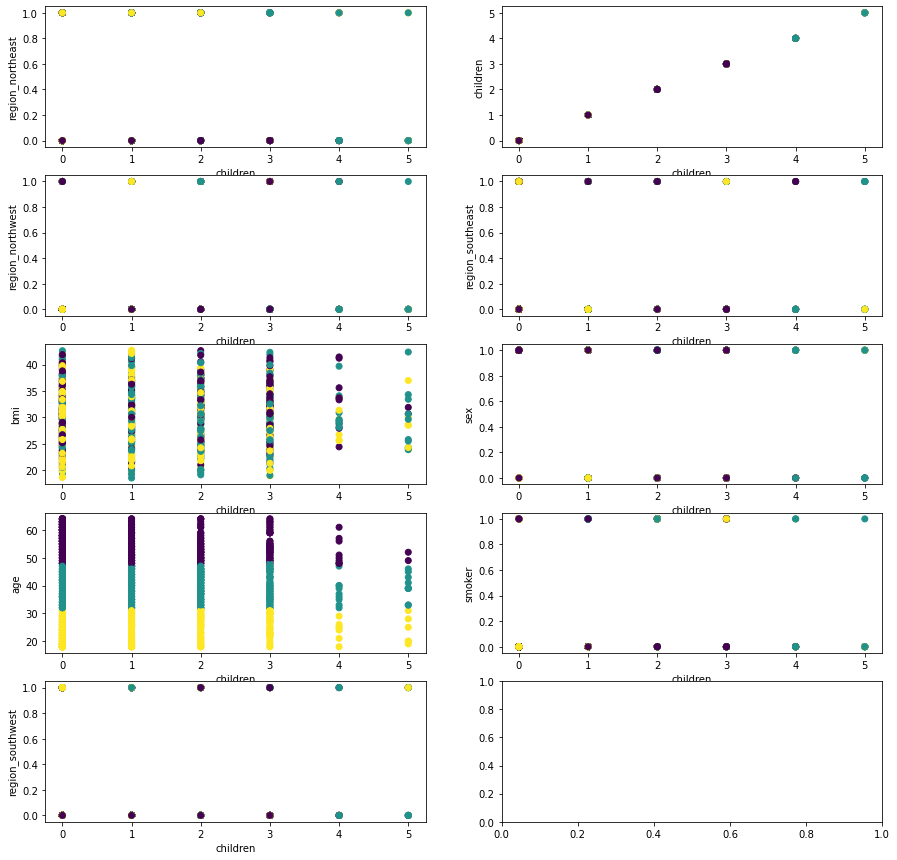

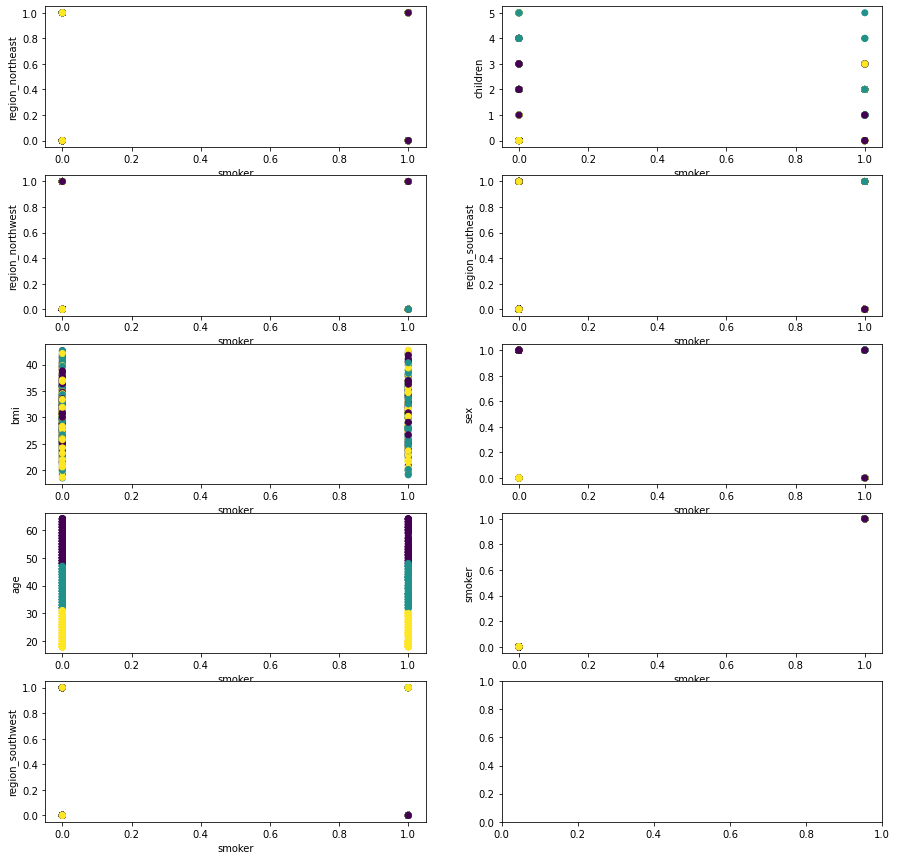

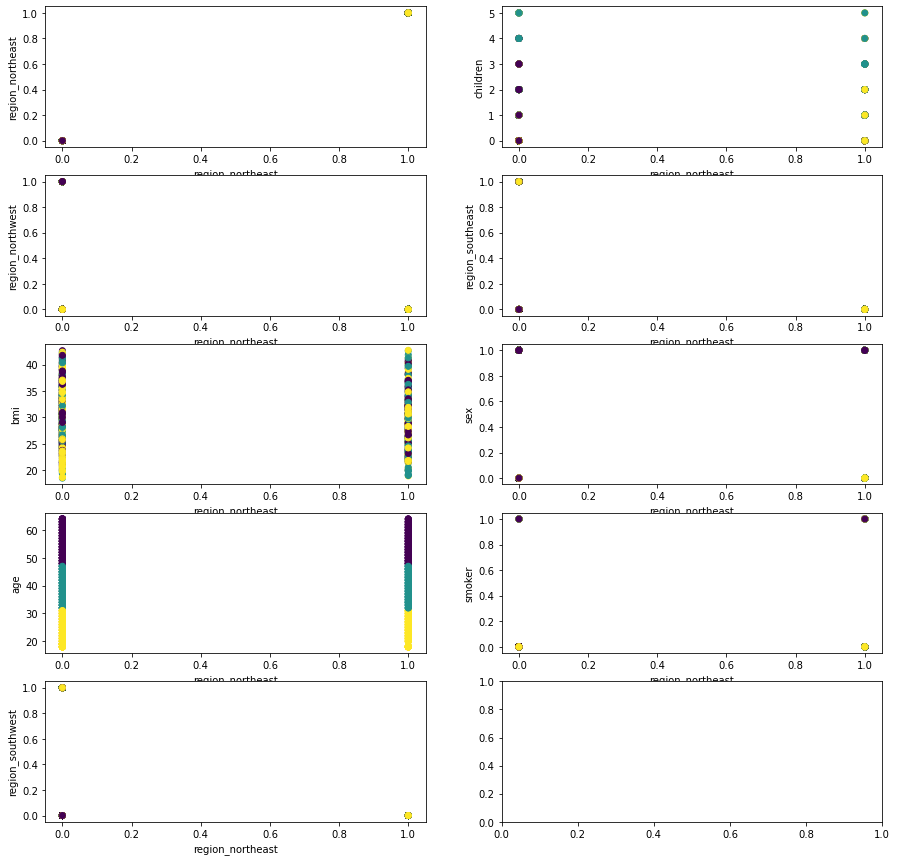

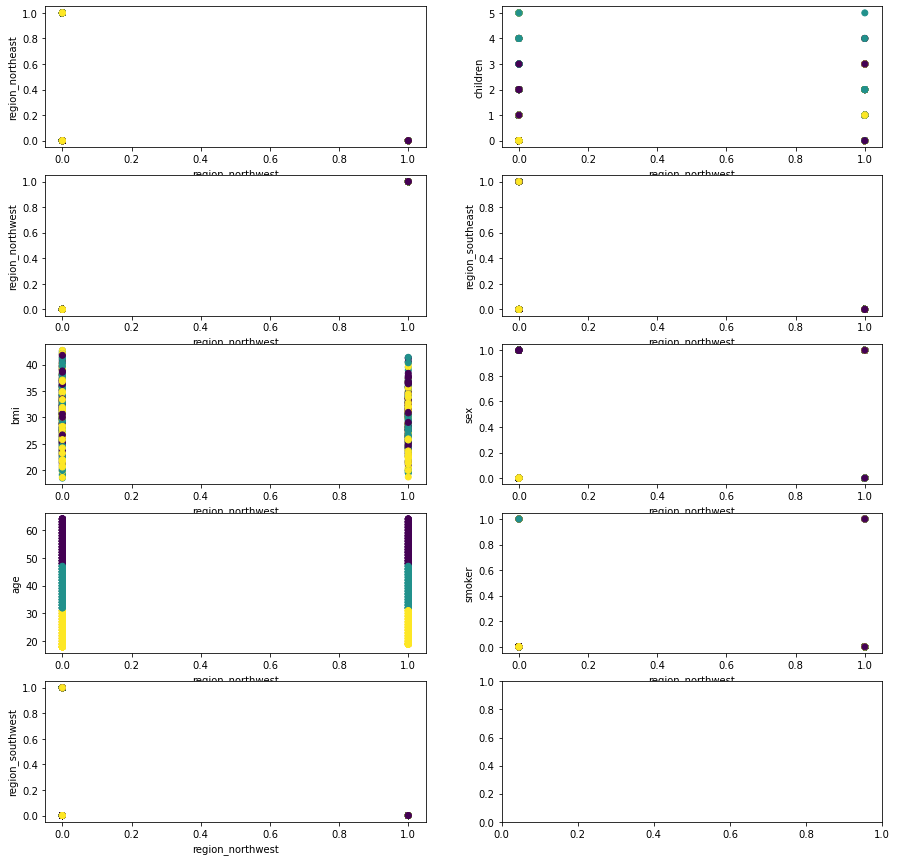

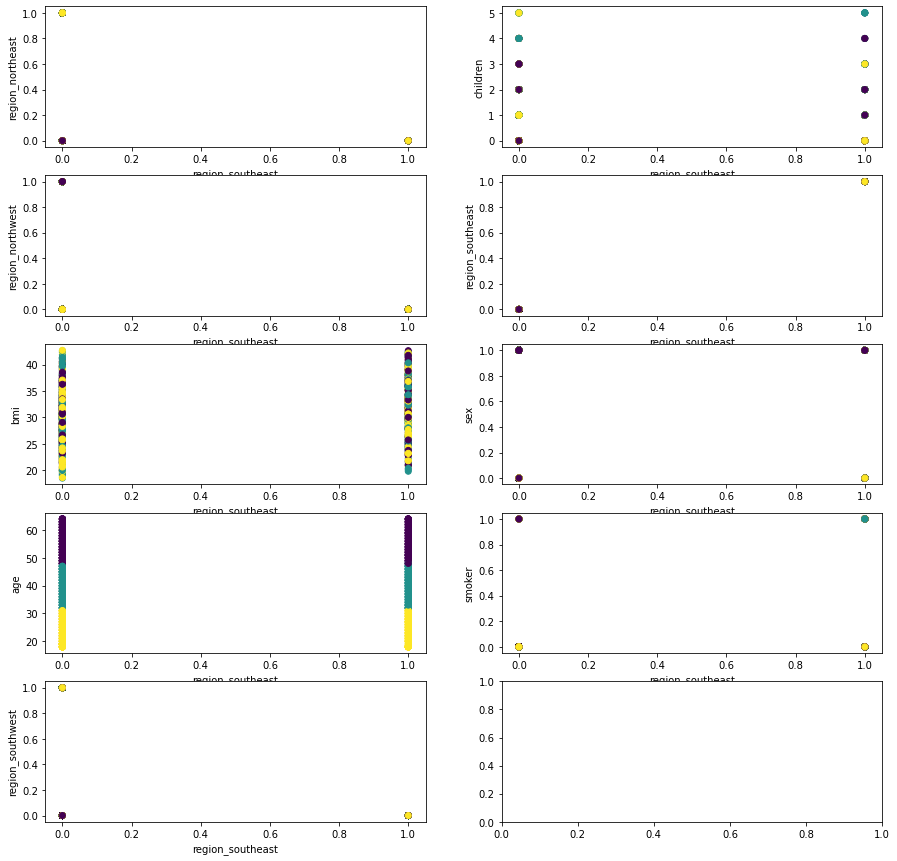

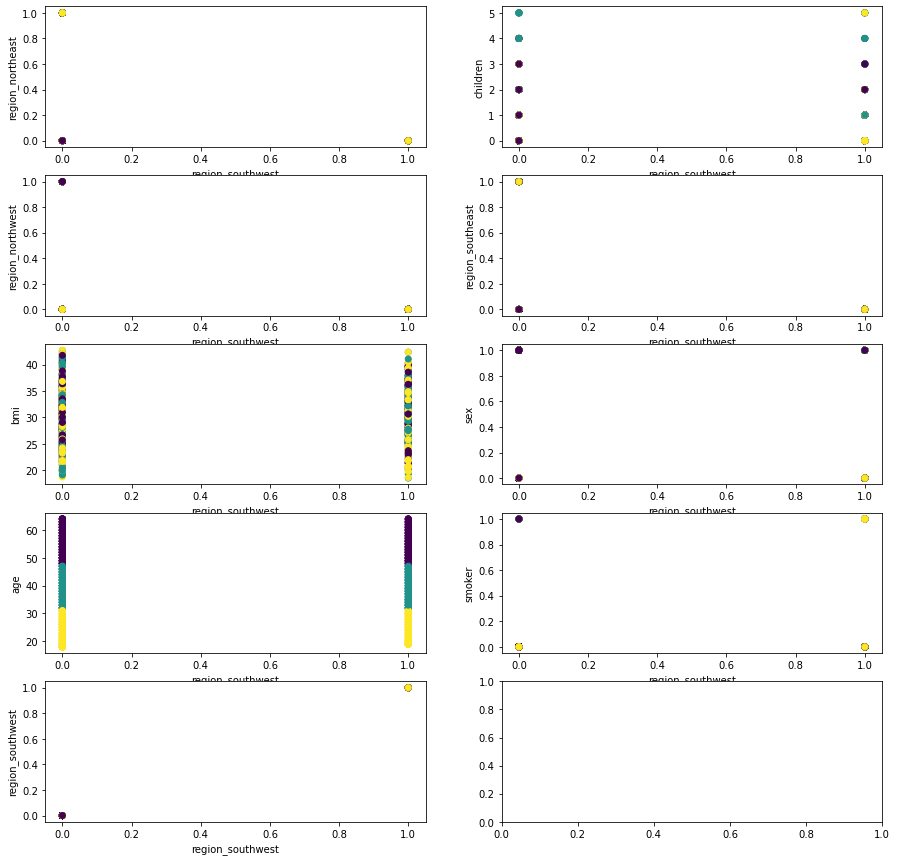

In [165]:
x = df.drop('charges in INR',axis=1)
for col in x.columns:
    clustering(x,col,cluster)

Analysis
- Age is forming clear cluster with all other independent variable

In [166]:
new_df = df.join(pd.DataFrame(cluster,columns=['cluster']), how = 'left')

In [167]:
new_df

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,cluster
0,19,0,27.900,16884.92400,0,1,0,0,0,1,2
1,18,1,33.770,1725.55230,1,0,0,0,1,0,2
2,28,1,33.000,4449.46200,3,0,0,0,1,0,2
3,33,1,22.705,21984.47061,0,0,0,1,0,0,1
4,32,1,28.880,3866.85520,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,0,1,0,0,0
1334,18,0,31.920,2205.98080,0,0,1,0,0,0,2
1335,18,0,36.850,1629.83350,0,0,0,0,1,0,2
1336,21,0,25.800,2007.94500,0,0,0,0,0,1,2


In [168]:
new_f = new_df.groupby('cluster')['age'].agg(['mean','median'])

In [169]:
new_f

,mean,median
cluster,,
0,55.608200,55.0
1,39.754673,40.0
2,23.422505,23.0


In [170]:
cluster_df = new_df.merge(new_f, on = 'cluster', how = 'left')
cluster_df.head()

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,cluster,mean,median
0,19,0,27.900,16884.92400,0,1,0,0,0,1,2,23.422505,23.0
1,18,1,33.770,1725.55230,1,0,0,0,1,0,2,23.422505,23.0
2,28,1,33.000,4449.46200,3,0,0,0,1,0,2,23.422505,23.0
3,33,1,22.705,21984.47061,0,0,0,1,0,0,1,39.754673,40.0
4,32,1,28.880,3866.85520,0,0,0,1,0,0,1,39.754673,40.0


### Model Evaluation On Cluster Dataset

In [171]:
multiple_models(cluster_df,'charges in INR')

,Model Name,R2 Score,RMSE
0,Gradient Boost Regressor,0.870183,4402.178990
1,Random Forest Regressor,0.855208,4649.152913
2,XGB Regressor,0.807761,5357.017000
3,AdaBoost Regressor,0.765345,5918.573990
4,Linear Regression,0.763242,5945.036207
5,Lasso,0.763233,5945.139960
6,Ridge,0.763066,5947.236271
7,Decision Tree Regressor,0.758908,5999.202227
8,K Neighbors Regressor,0.166882,11152.057809
9,SVR,-0.115770,12905.925967


In [172]:
KFoldCV(cluster_df.drop('charges in INR',axis=1),cluster_df['charges in INR'])

,Model Name,CV Score,CV Stdev
0,Gradient Boost Regressor,0.842299,0.053824
1,Random Forest Regressor,0.827098,0.049191
2,XGB Regressor,0.798818,0.059386
3,Ridge,0.744916,0.041869
4,Linear Regression,0.744891,0.042192
5,Decision Tree Regressor,0.744697,0.043026
6,AdaBoost Regressor,0.728831,0.053836
7,Lasso,0.698232,0.058377
8,K Neighbors Regressor,0.173240,0.085460
9,SVR,-0.105959,0.030939


In [173]:
CV_Post_HPT(cluster_df.drop('charges in INR',axis= 1),cluster_df['charges in INR'])

,Model Name,CV Score,CV Stdev
0,XGB Regressor,0.842296,0.053074
1,Gradient Boost Regressor,0.835017,0.056639
2,Random Forest Regressor,0.820045,0.042858
3,AdaBoost Regressor,0.812332,0.040749
4,Lasso,0.799538,0.036820
5,Linear Regression,0.744891,0.042192
6,Ridge,0.744675,0.040635
7,Decision Tree Regressor,0.744483,0.043015
8,K Neighbors Regressor,0.194639,0.091156
9,SVR,-0.106220,0.032267


## Feature Importance

In [174]:
cluster_df

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,cluster,mean,median
0,19,0,27.900,16884.92400,0,1,0,0,0,1,2,23.422505,23.0
1,18,1,33.770,1725.55230,1,0,0,0,1,0,2,23.422505,23.0
2,28,1,33.000,4449.46200,3,0,0,0,1,0,2,23.422505,23.0
3,33,1,22.705,21984.47061,0,0,0,1,0,0,1,39.754673,40.0
4,32,1,28.880,3866.85520,0,0,0,1,0,0,1,39.754673,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,0,1,0,0,0,55.608200,55.0
1334,18,0,31.920,2205.98080,0,0,1,0,0,0,2,23.422505,23.0
1335,18,0,36.850,1629.83350,0,0,0,0,1,0,2,23.422505,23.0
1336,21,0,25.800,2007.94500,0,0,0,0,0,1,2,23.422505,23.0


In [175]:
x_train,x_test,y_train,y_test = train_and_test_split(cluster_df,'charges in INR')

In [176]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

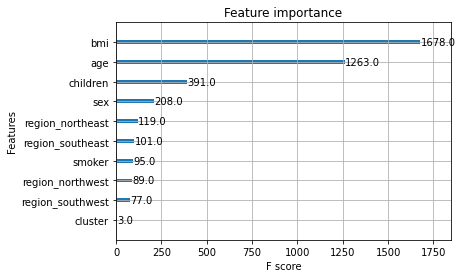

In [177]:
xgboost.plot_importance(xgb)

In [178]:
subset_df = cluster_df[['age','bmi','children','sex','region_northeast','region_southeast','smoker','charges in INR']]

In [179]:
CV_Post_HPT(subset_df.drop('charges in INR',axis= 1),subset_df['charges in INR'])

,Model Name,CV Score,CV Stdev
0,XGB Regressor,0.840864,0.051759
1,Random Forest Regressor,0.839046,0.043881
2,Gradient Boost Regressor,0.836892,0.056770
3,AdaBoost Regressor,0.809021,0.041104
4,Lasso,0.798959,0.058020
5,Decision Tree Regressor,0.743563,0.044102
6,Linear Regression,0.743159,0.044709
7,Ridge,0.742955,0.042967
8,K Neighbors Regressor,0.200947,0.072165
9,SVR,-0.104164,0.031298


## Recursive Feature Elimination (RFE)

In [180]:
rfe_dfe = cluster_df
rfe = RFE(estimator= XGBRegressor())
rfe.fit(cluster_df.drop('charges in INR',axis=1),cluster_df['charges in INR'])
rfe.support_

array([ True, False,  True,  True,  True, False,  True, False, False,
        True, False, False])

In [181]:
cluster_df.columns

Index(['age', 'sex', 'bmi', 'charges in INR', 'children', 'smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'cluster', 'mean', 'median'],
      dtype='object')

In [182]:
rfe_df = cluster_df[['age','bmi','charges in INR','children','region_northeast','region_southwest']]

In [183]:
CV_Post_HPT(rfe_df.drop('charges in INR',axis= 1),subset_df['charges in INR'])

,Model Name,CV Score,CV Stdev
0,Decision Tree Regressor,0.109802,0.045786
1,Ridge,0.109587,0.045704
2,Linear Regression,0.109496,0.045653
3,AdaBoost Regressor,0.039301,0.068228
4,Random Forest Regressor,0.000214,0.091357
5,Gradient Boost Regressor,-0.009907,0.104232
6,XGB Regressor,-0.023273,0.106941
7,K Neighbors Regressor,-0.084043,0.141408
8,SVR,-0.104167,0.031490
9,Lasso,NaN,NaN


# Learning Curve Analysis

In [184]:
def generatae_Learning_curve(model_name,estimator,x,y):
    train_size,train_score,test_score = learning_curve(estimator,x,y,cv=10)
    #print('train_size',train_size)
    #print('train_score',train_score)
    #print('test_score',test_score)
    train_score_maen = np.mean(train_score,axis=1)
    test_score_mean =  np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_maen,c = 'blue')
    plt.plot(train_size,test_score_mean,c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('Score')
    plt.title("Learning")
    plt.title("Learning Curve for "+model_name)
    plt.legend('Training Accuracy','Tesing Accuracy')

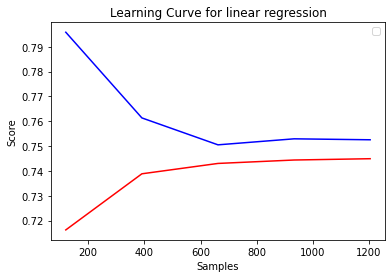

In [185]:
generatae_Learning_curve('linear regression',LinearRegression(),cluster_df.drop('charges in INR',axis=1),cluster_df['charges in INR'])

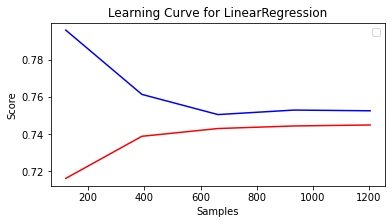

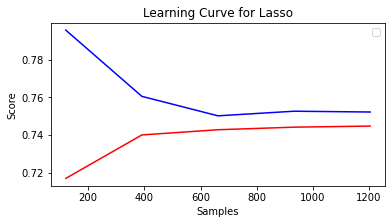

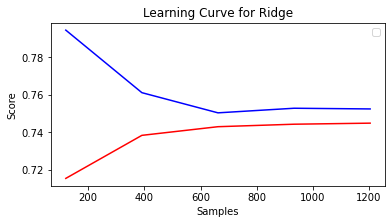

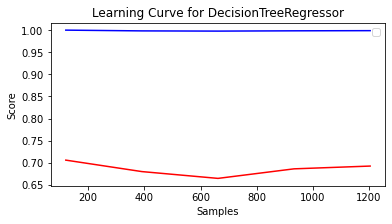

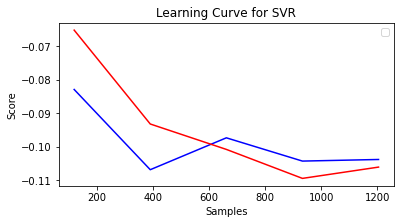

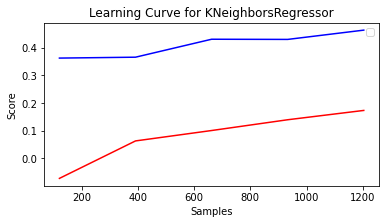

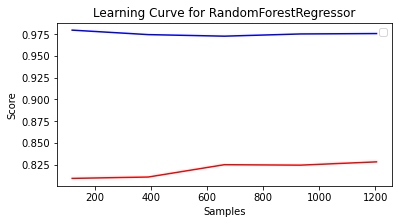

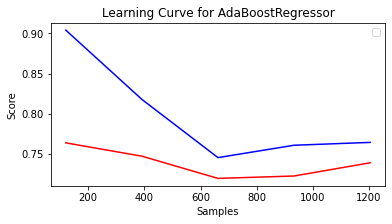

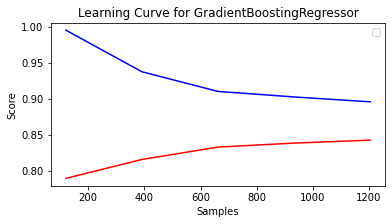

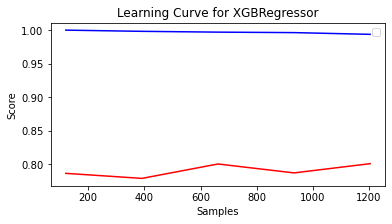

In [186]:
model_names = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
for i,model in enumerate(model_names):
    fg = plt.figure(figsize=(6,3))
    ax = fig.add_subplot(5,2,i+1)
    generatae_Learning_curve(type(model).__name__,model,cluster_df.drop('charges in INR',axis=1),cluster_df['charges in INR'])

## Model prediction on Unseen Data

In [187]:
x_train,x_test,y_train,y_test = train_and_test_split(cluster_df,'charges in INR',testsize=0.1)
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [188]:
x_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,cluster,mean,median
355,46,1,27.600000,0,0,0,0,0,1,1,39.754673,40.0
1316,19,0,20.600000,0,0,0,0,0,1,2,23.422505,23.0
133,19,1,25.555000,0,0,0,1,0,0,2,23.422505,23.0
181,18,0,38.280000,0,0,0,0,1,0,2,23.422505,23.0
1133,52,0,30.663397,0,0,0,1,0,0,0,55.608200,55.0


In [193]:
test_data = [[19,1,25.50,0,0,0,0,1,0,2,23.42,23.0]]

In [192]:
labels.predict(test_data)

array([2])

In [194]:
model.predict(pd.DataFrame(test_data,columns=x_train.columns))

array([1716.1565], dtype=float32)

In [195]:
merged_details.head(134)

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1725.55230,1,0,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,0,1,0
3,33,1,22.705,21984.47061,0,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
129,38,1,34.700,6082.40500,2,0,0,0,0,1
130,59,0,26.505,12815.44495,0,0,1,0,0,0
131,61,0,22.040,13616.35860,0,0,1,0,0,0
132,53,0,35.900,11163.56800,2,0,0,0,0,1
